<a href="https://colab.research.google.com/github/BiancadeFrancisco/BiancadeFrancisco/blob/main/Case_int_analise_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###ANALISANDO DADOS E CRIANDO DASHBOARD COM PYTHON
* A Questão de Negócio:
 - Qual a minha meta?
   | Achar o melhor custo benefíciopara a sua situação
 - Como posso chegar lá?
   | Escolhendo imóveis que vão de acordo com a sua característica

* O entendimento do negócio:
 - Eles são relevantes para o problema?
 - Eles me trazem uma solução direta?
 - Qual o meu setor, ou range do negócio?

* A coleta de dados:
 - Os dados que eu tenho fazem sentido?
 - Estão no formato que eu gostaria?
 - O que mais eu consigo obter de informação desses dados?

* A limpeza dos dados:
* Data
* A exploração dos dados:
 - Visualização dos dados
 - Quais as minhas métricas essenciais

In [ ]:
#IMPORTAR BIBLIOTECA (NESSE CASO: PANDAS)

import pandas as pd

In [ ]:
#IMPORTAR O ARQUIVO DE DADOS

aluguel_casa = pd.read_excel("/content/houses_rent.xlsx")


In [ ]:
#FUNÇÃO HEAD() PARA VER AS 5 PRIMEIRAS LINHAS DE DADOS
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,Barcelona,240,3,3,4,-,accept,furnished,600,8000,1000,121,9121
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820,122,11,1493
2,2,Barcelona,443,5,5,4,3,accept,furnished,4172,7000,1417,89,12680
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250,150,16,2116
4,4,Barcelona,19,1,1,0,-,not accept,not furnished,0,1200,41,16,1257


In [ ]:
#FUNÇÃO TAIL() PARA VER AS 5 ULTIMAS LINHAS DE DADOS
aluguel_casa.tail()

,index,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
6075,6075,Barcelona,50,2,1,1,2,accept,not furnished,420,1150,0,15,1585
6076,6076,Barcelona,84,2,2,1,16,not accept,furnished,768,2900,63,37,3768
6077,6077,Porto,48,1,1,0,13,accept,not furnished,250,950,42,13,1255
6078,6078,Barcelona,160,3,2,2,-,not accept,not furnished,0,3500,250,53,3803
6079,6079,Barcelona,60,2,1,1,4,accept,furnished,489,1900,0,25,2414


PARA ESSAS FUNÇÕES COM (), POSSO ACRESCENTAR O PARÂMETRO DENTRO DELES, OU SEJA, POSSO ACRESCETAR O NÚMERO DE LINHAS QUE QUERO VISUALIZAR

##CONFIGURANDO OS DADOS DA TABELA

In [ ]:
#DEIXAR PADRÃO O NOME DE CADA COLUNA, UNINDO AS PALAVRAS COM _

aluguel_casa = aluguel_casa.rename(columns={"parking spaces":"parking_spaces", "rent amount":"rent_amount", "property tax":"property_tax", "fire insurance":"fire_insurance"})

aluguel_casa.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,0,Barcelona,240,3,3,4,-,accept,furnished,600,8000,1000,121,9121
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820,122,11,1493
2,2,Barcelona,443,5,5,4,3,accept,furnished,4172,7000,1417,89,12680
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250,150,16,2116
4,4,Barcelona,19,1,1,0,-,not accept,not furnished,0,1200,41,16,1257


In [ ]:
#VERIFICANDO TIPOS DE DADOS DA TABELA

aluguel_casa.dtypes

index              int64
city              object
area               int64
rooms              int64
bathroom           int64
parking_spaces     int64
floor             object
animal            object
furniture         object
hoa               object
rent_amount        int64
property_tax       int64
fire_insurance     int64
total              int64
dtype: object

In [ ]:
#AJUSTANDO OS TIPOS DE DADOS NECESSÁRIOS (nesse caso, alterar os dados de valores int para float)

aluguel_casa = aluguel_casa.astype({"rent_amount":"float", "property_tax":"float", "fire_insurance":"float", "total":"float"})
aluguel_casa.dtypes


index               int64
city               object
area                int64
rooms               int64
bathroom            int64
parking_spaces      int64
floor              object
animal             object
furniture          object
hoa                object
rent_amount       float64
property_tax      float64
fire_insurance    float64
total             float64
dtype: object

#ENTENDENDO OS DADOS

In [ ]:
#USANDO FUNÇÃO INFO (trazer as informações dos dados)

aluguel_casa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           6080 non-null   int64  
 1   city            6080 non-null   object 
 2   area            6080 non-null   int64  
 3   rooms           6080 non-null   int64  
 4   bathroom        6080 non-null   int64  
 5   parking_spaces  6080 non-null   int64  
 6   floor           6080 non-null   object 
 7   animal          6080 non-null   object 
 8   furniture       6080 non-null   object 
 9   hoa             6080 non-null   object 
 10  rent_amount     6080 non-null   float64
 11  property_tax    6080 non-null   float64
 12  fire_insurance  6080 non-null   float64
 13  total           6080 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 665.1+ KB


In [ ]:
#ASSIM COMO SQL, QUERO VISUALIZAR APENAS ALGUMAS COLUNAS SELECIONADAS E DESCREVÊ-LAS

aluguel_casa[{"area", "rooms", "bathroom", "parking_spaces", "rent_amount", "property_tax", "fire_insurance", "total"}].describe()

#count: quantidade de dados (linhas)
#mean: média (total valor/total de dados)
#std: desvio padrão (o quanto os pontos estão longe da minha média) / quando tenho um std > mean significa que tenho valores muito distantes um do outro, nesse caso apartamentos muito grandes e apartamentos muito pequenos
#min: o valor mínimo daquele dado
#max: o valor máximo daquele dado


<ipython-input-16-bc0ee5fa168c>:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  aluguel_casa[{"area", "rooms", "bathroom", "parking_spaces", "rent_amount", "property_tax", "fire_insurance", "total"}].describe()


,rent_amount,bathroom,area,property_tax,total,fire_insurance,rooms,parking_spaces
count,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000
mean,4395.844408,2.341612,151.143914,490.533224,6033.194572,58.204276,2.492599,1.756250
std,3576.668946,1.438860,375.559485,6212.549484,8751.347700,49.313441,1.129665,1.611909
min,420.000000,1.000000,10.000000,0.000000,660.000000,3.000000,1.000000,0.000000
25%,1800.000000,1.000000,58.000000,34.000000,2451.500000,23.000000,2.000000,1.000000
50%,3111.000000,2.000000,100.000000,145.000000,4128.500000,41.000000,3.000000,1.000000
75%,5952.500000,3.000000,200.000000,458.000000,8074.000000,77.000000,3.000000,2.000000
max,45000.000000,10.000000,24606.000000,366300.000000,372700.000000,677.000000,10.000000,12.000000


##FILTRANDO OS DADOS

In [ ]:
#FILTRAR OS DADOS COM O VALOR MÁXIMO DE UMA COLUNA (nesse caso na coluna total)

aluguel_casa = aluguel_casa[(aluguel_casa["total"]<=4000)]
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250.0,150.0,16.0,2116.0
4,4,Barcelona,19,1,1,0,-,not accept,not furnished,0,1200.0,41.0,16.0,1257.0
5,5,Barcelona,13,1,1,0,2,accept,not furnished,0,2200.0,42.0,28.0,2270.0
7,7,Barcelona,55,2,2,1,2,accept,not furnished,600,1300.0,67.0,17.0,1984.0


In [ ]:
#ACRESCENTAR OUTRO FILTRO (além do aluguel máx de 4000, quero filtrar imóveis que aceitam animais)

aluguel_casa = aluguel_casa[(aluguel_casa["total"]<=4000) & (aluguel_casa["animal"]=="accept")]
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250.0,150.0,16.0,2116.0
5,5,Barcelona,13,1,1,0,2,accept,not furnished,0,2200.0,42.0,28.0,2270.0
7,7,Barcelona,55,2,2,1,2,accept,not furnished,600,1300.0,67.0,17.0,1984.0
8,8,Barcelona,82,3,1,1,3,accept,furnished,828,2000.0,109.0,26.0,2963.0


In [ ]:
#ACRESCENTAR OUTRO FILTRO (além do aluguel máx de 4000, imóveis que aceitam animais, quero filtrar tbm imóveis com 2 ou 3 quartos)

aluguel_casa = aluguel_casa[(aluguel_casa["total"]<=4000) & (aluguel_casa["animal"]=="accept") & (aluguel_casa["rooms"]==2) | (aluguel_casa["rooms"]==3)]
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250.0,150.0,16.0,2116.0
7,7,Barcelona,55,2,2,1,2,accept,not furnished,600,1300.0,67.0,17.0,1984.0
8,8,Barcelona,82,3,1,1,3,accept,furnished,828,2000.0,109.0,26.0,2963.0
15,15,Porto,56,2,1,1,1,accept,not furnished,345,950.0,11.0,13.0,1319.0


In [ ]:
#DESCREVER O DATASET APÓS OS FILTROS (peerceba que os dados estão reduzidos)

aluguel_casa.describe()

,index,area,rooms,bathroom,parking_spaces,rent_amount,property_tax,fire_insurance,total
count,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000
mean,3003.132907,100.432836,2.379531,1.653873,1.212509,1964.006397,95.678749,25.899787,2556.358209
std,1739.608911,340.999109,0.485443,0.745034,0.973862,692.152422,107.359160,11.078694,783.028975
min,1.000000,30.000000,2.000000,1.000000,0.000000,450.000000,0.000000,5.000000,843.000000
25%,1453.000000,60.000000,2.000000,1.000000,1.000000,1445.500000,1.500000,17.000000,1962.500000
50%,3001.000000,76.000000,2.000000,2.000000,1.000000,1900.000000,67.000000,25.000000,2507.000000
75%,4518.500000,100.000000,3.000000,2.000000,2.000000,2450.000000,144.000000,32.000000,3181.500000
max,6079.000000,12732.000000,3.000000,6.000000,8.000000,3915.000000,791.000000,59.000000,3998.000000


In [ ]:
#OUTRA MANEIRA DE REALIZAR FILTROS (UTILIZAR O .QUERY)

aluguel_casa = aluguel_casa.query(("total <= 4000 and animal == 'accept' and rooms == 2 or rooms == 3"))
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250.0,150.0,16.0,2116.0
7,7,Barcelona,55,2,2,1,2,accept,not furnished,600,1300.0,67.0,17.0,1984.0
8,8,Barcelona,82,3,1,1,3,accept,furnished,828,2000.0,109.0,26.0,2963.0
15,15,Porto,56,2,1,1,1,accept,not furnished,345,950.0,11.0,13.0,1319.0


##AGRUPANDO OS DADOS

In [ ]:
#AGRUPAR POR CIDADE, USANDO COMO BASE A MÉDIA DO PREÇO, E COLOCANDO EM MODO DE TABELA

agg_city_price = aluguel_casa.groupby(["city"])["total"].agg("mean").reset_index()
agg_city_price

,city,total
0,Barcelona,2683.503759
1,Porto,2161.947522


In [ ]:
#AGRUPAR PREÇO POR QTD DE BANHEIRO E QUARTOS, COM BASE NA MÉDIA DO PREÇO, E COLOCANDO EM MODO DE TABELA

agg_bath_room_price = aluguel_casa.groupby(["bathroom", "rooms"])["total"].agg("mean").reset_index()
agg_bath_room_price

,bathroom,rooms,total
0,1,2,2091.175221
1,1,3,2542.509091
2,2,2,2734.612903
3,2,3,2928.720395
4,3,2,3057.440000
5,3,3,3217.704545
6,4,2,3136.000000
7,4,3,3461.133333
8,5,3,3245.000000
9,6,3,3101.000000


##VISUALIZANDO OS DADOS

In [ ]:
#UTILIZAR A BIBLIOTECA SEABORN PARA VISUALIZAR OS DADOS

import seaborn as sns

<Axes: xlabel='rooms', ylabel='total'>

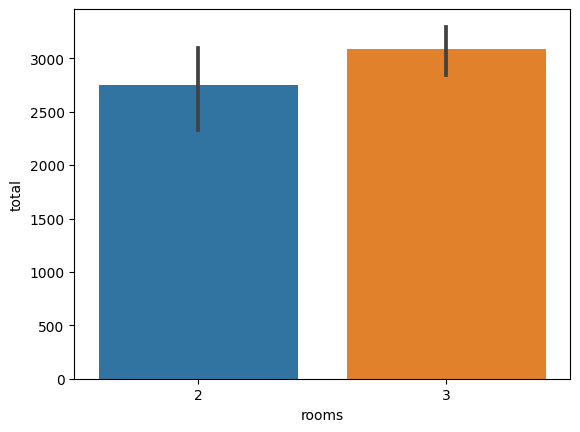

In [ ]:
#FAZENDO UM GRÁFICO DE BARRAS (barplot) COM OS FILTROS ACIMA

sns.barplot(data=agg_bath_room_price, x="rooms", y="total")

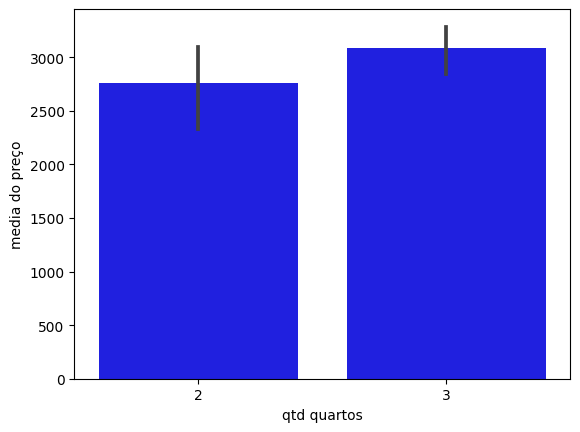

In [ ]:
#CONFIGURANDO O GRÁFICO

ax = sns.barplot(data=agg_bath_room_price, x="rooms", y="total", color="blue");
ax.set(xlabel = "qtd quartos", ylabel = "media do preço");


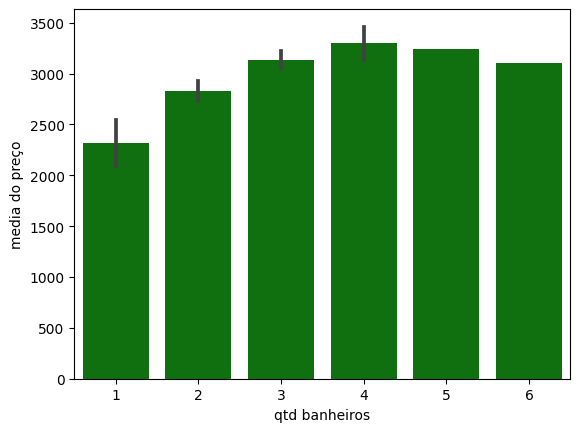

In [ ]:
ax = sns.barplot(data=agg_bath_room_price, x="bathroom", y="total", color="green");
ax.set(xlabel = "qtd banheiros", ylabel = "media do preço");

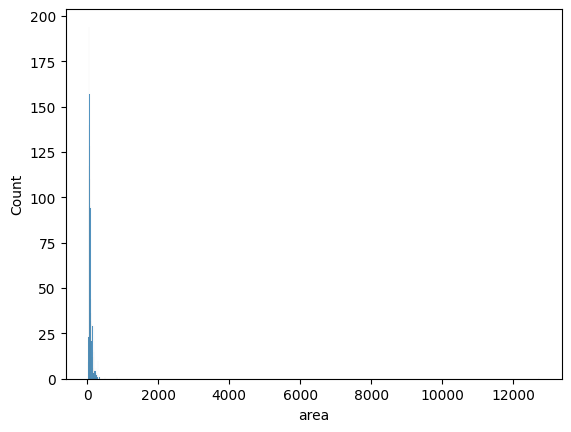

In [ ]:
#GRÁFICO PARA VISUALIZAR O DESVIO PADRÃO DOS DADOS

agg_area = aluguel_casa[["area"]];

sns.histplot(data=agg_area, x="area");

In [ ]:
agg_area.describe()

,area
count,1407.000000
mean,100.432836
std,340.999109
min,30.000000
25%,60.000000
50%,76.000000
75%,100.000000
max,12732.000000


#FILTRANDO OS DADOS PARA FICAREM COM AREA MENOR E O GRÁFICO FICAR MELHOR PARA VISUALIZAÇÃO

In [ ]:
agg_area = agg_area.query("area <= 100")

agg_area.describe()


,area
count,1064.000000
mean,69.641917
std,15.962461
min,30.000000
25%,57.000000
50%,69.000000
75%,80.000000
max,100.000000


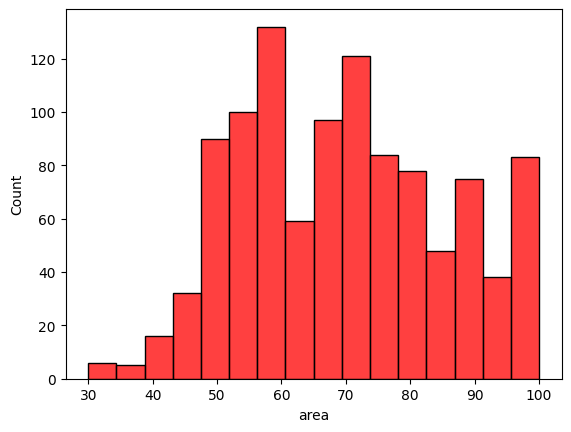

In [ ]:
agg_area = agg_area.query("area <= 100")

sns.histplot(data=agg_area, x="area", color = "red");

#FAZENDO UM GRÁFICO DE FREQUENCIA PARA COMPARAR A TABELA DE VALORES POR CIDADE

In [ ]:
agg_city_price = aluguel_casa.groupby(["city"])["total"].agg("mean").reset_index()
agg_city_price

,city,total
0,Barcelona,2683.503759
1,Porto,2161.947522


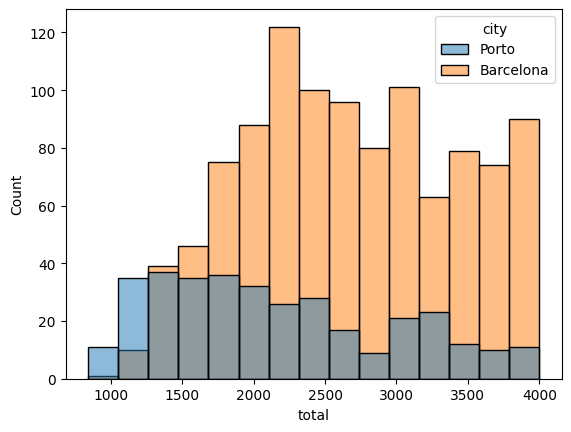

In [ ]:
sns.histplot(data=aluguel_casa, x="total", hue = "city");

##SELECIONANDO O APARTAMENTO

In [ ]:
aluguel_casa = aluguel_casa.query("city == 'Porto'")
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
15,15,Porto,56,2,1,1,1,accept,not furnished,345,950.0,11.0,13.0,1319.0
16,16,Porto,188,2,3,8,-,accept,not furnished,0,3010.0,584.0,46.0,3640.0
28,28,Porto,150,3,2,2,13,accept,not furnished,1370,1800.0,250.0,23.0,3443.0
36,36,Porto,94,3,3,2,1,accept,not furnished,750,2200.0,192.0,28.0,3170.0


In [ ]:
aluguel_casa.describe()

,index,area,rooms,bathroom,parking_spaces,rent_amount,property_tax,fire_insurance,total
count,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000
mean,2984.862974,128.889213,2.481050,1.597668,1.381924,1568.731778,91.655977,21.166181,2161.947522
std,1765.093849,684.179001,0.500371,0.701873,1.063713,687.146046,81.422431,10.449199,803.341044
min,1.000000,40.000000,2.000000,1.000000,0.000000,450.000000,0.000000,5.000000,843.000000
25%,1433.500000,60.000000,2.000000,1.000000,1.000000,1060.500000,39.500000,13.000000,1494.000000
50%,3052.000000,76.000000,2.000000,1.000000,1.000000,1350.000000,75.000000,18.000000,2017.000000
75%,4522.000000,101.500000,3.000000,2.000000,2.000000,2000.000000,120.500000,26.000000,2738.500000
max,6055.000000,12732.000000,3.000000,4.000000,8.000000,3500.000000,600.000000,53.000000,3994.000000


In [ ]:
#AGRUPAR OPÇÕES POR ANDAR

aluguel_casa.groupby("floor").index.nunique().sort_values(ascending=False)

floor
-     77
1     52
3     51
2     31
4     26
7     20
5     16
6     13
11    11
9      9
8      7
10     6
12     6
15     5
13     4
17     3
16     2
14     1
18     1
19     1
51     1
Name: index, dtype: int64

In [ ]:
agg_floor_price = aluguel_casa.groupby("floor")["total"].agg("mean").reset_index()
agg_floor_price

,floor,total
0,1,2004.096154
1,2,1745.322581
2,3,1709.921569
3,4,1872.923077
4,5,2385.812500
5,6,2331.307692
6,7,2340.750000
7,8,2744.714286
8,9,2941.111111
9,10,1946.666667


<Axes: xlabel='floor', ylabel='total'>

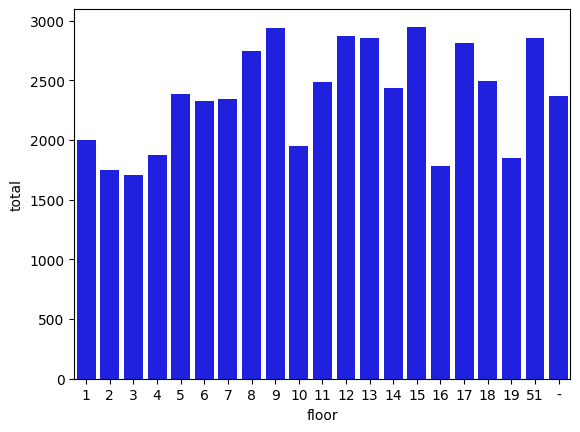

In [ ]:
sns.barplot(data=agg_floor_price, x="floor", y="total", color = "blue")

In [ ]:
#FILTRANDO PELO NÚMERO DO ANDAR

sixteenth_floor = aluguel_casa.query("floor == 16")
sixteenth_floor.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1843,1843,Porto,100,2,1,0,16,accept,not furnished,550,900.0,61.0,12.0,1523.0
5175,5175,Porto,72,2,1,2,16,accept,not furnished,730,1200.0,89.0,16.0,2035.0
